In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from lifelines import KaplanMeierFitter
import timeit

# 1. Binary Classification

### 1.1 Titanic, but correctly this time

Take your linear regression model from the workshop 3.3 on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
sm.Logit(
    df['survived'],
        sm.add_constant(pd.get_dummies(df.deck))
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.611190
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                 0.08218
Time:                        23:33:12   Log-Likelihood:                -544.57
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.515e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8501      0.083    -10.212      0.000      -1.013      -0.687
A              0.7165      0.524      1.367      0.172      -0.311       1.744
B              1.9205      0.345      5.571      0.000       1.245       2.596
C              1.2274      0.278      4.418      0.000       0.683       1.772
D              1.9895      0.415      4.798      0.000       1.177       2.802
E              1.9487      0.417      4.677      0.000       1.132       2.765
F              1.3201      0.576      2.291      0.022       0.191       2.449
G              0.8501      1.003      0.847      0.397      -1.117       2.817
==============================================================================
"""

In [4]:
sm.OLS(
    df['survived'],
        sm.add_constant(pd.get_dummies(df.deck))
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     15.73
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.57e-19
Time:                        23:33:12   Log-Likelihood:                -569.61
No. Observations:                 891   AIC:                             1155.
Df Residuals:                     883   BIC:                             1194.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2994      0.018     17.049      0.000       0.265       0.334
A              0.1672      0.120      1.391      0.165      -0.069       0.403
B              0.4453      0.069      6.411      0.000       0.309       0.582
C              0.2938      0.062      4.702      0.000       0.171       0.416
D              0.4582      0.082      5.581      0.000       0.297       0.619
E              0.4506      0.083      5.409      0.000       0.287       0.614
F              0.3160      0.129      2.450      0.014       0.063       0.569
G              0.2006      0.231      0.868      0.385      -0.253       0.654
==============================================================================
Omnibus:                     1099.642   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.042
Skew:                           0.515   Prob(JB):                     5.13e-22
Kurtosis:                       1.744   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
print("OLS seems to give better P and R-squared values")

OLS seems to give better P and R-squared values


# 2. Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.

- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 
```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.

- You should be able to get at least 80% on a test set size of 10_000

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
data = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X, y = data[0], data[1]
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (70000, 784) 
 Shape of y: (70000,)


In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_train, y_train, cv=3, scoring='accuracy')
logreg.score(X_test, y_test)

C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9255

# 3. Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or more fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

**FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.

**LIVE_BAIT:** A binary variable indicating whether live bait was used.

**CAMPER:** Whether the fishing group used a camper van.

**PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.

**CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (FISH_COUNT) by a camping group based on the values of LIVE_BAIT, CAMPER, PERSONS and CHILDREN variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort I went through to find a fish dataset for a count problem pun.

In [8]:
fish = pd.read_csv('data/fish.csv')
fish

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
...,...,...,...,...,...
245,1,1,2,0,0
246,1,1,4,3,0
247,1,1,2,1,0
248,1,1,3,2,0


In [9]:
y = fish['FISH_COUNT']
X = fish[['LIVE_BAIT', 'CAMPER', 'PERSONS', 'CHILDREN']]

x_train, x_val, y_train, y_val = train_test_split(X, y)

fishy_business = sm.ZeroInflatedPoisson(endog=y_train, exog=x_train, exog_infl=x_train, inflation='logit').fit()
fishy_business.summary()

C:\Users\gaia_\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 2.399098
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              FISH_COUNT   No. Observations:                  187
Model:             ZeroInflatedPoisson   Df Residuals:                      183
Method:                            MLE   Df Model:                            3
Date:                 Sun, 07 Feb 2021   Pseudo R-squ.:                  0.2715
Time:                         23:34:45   Log-Likelihood:                -448.63
converged:                        True   LL-Null:                       -615.82
Covariance Type:             nonrobust   LLR p-value:                 3.589e-72
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_LIVE_BAIT     1.2913      0.460      2.808      0.005       0.390       2.193
inflate_CAMPER       -0.8346      0.380     -2.196      0.028      -1.580      -0.090
inflate_PERSONS      -0.6450      0.183     -3.522      0.000      -1.004      -0.286
inflate_CHILDREN      1.7590      0.334      5.269      0.000       1.105       2.413
LIVE_BAIT             0.5473      0.137      4.007      0.000       0.280       0.815
CAMPER                0.0313      0.100      0.312      0.755      -0.165       0.228
PERSONS               0.5494      0.039     14.237      0.000       0.474       0.625
CHILDREN             -0.7667      0.100     -7.630      0.000      -0.964      -0.570
=====================================================================================
"""

In [10]:
fishy_business.predict([1, 1, 3, 3])

array([0.50828379, 0.54840214, 0.54840214, 0.26375496, 0.10697471,
       0.83001325, 0.03805808, 0.10697471, 0.31952511, 0.35739216,
       0.01691055, 0.75676027, 0.64778965, 0.18464153, 0.10697471,
       0.87448276, 0.50828379, 0.01691055, 0.4643661 , 0.31952511,
       0.18464153, 0.54840214, 0.50828379, 0.39989468, 0.64778965,
       0.29849044, 0.26375496, 0.83001325, 0.26375496, 0.50545634,
       0.54840214, 0.35739216, 0.18464153, 0.10697471, 0.83001325,
       0.64778965, 0.83001325, 0.03805808, 0.75676027, 0.31952511,
       0.03805808, 0.64778965, 0.31952511, 0.75693018, 0.60926173,
       0.50828379, 0.64537577, 0.39989468, 0.75676027, 0.75676027,
       0.4643661 , 0.09029494, 0.54840214, 0.50828379, 0.01691055,
       0.15834009, 0.26375496, 0.22945063, 0.09029494, 0.50828379,
       0.35739216, 0.31952511, 0.13638768, 0.50828379, 0.09029494,
       0.64778965, 0.50828379, 0.39989468, 0.09029494, 0.09029494,
       0.50828379, 0.64778965, 0.4643661 , 0.39989468, 0.54840

In [11]:
print("Seems the different factors don't have an overall significant effect on the model")

Seems the different factors don't have an overall significant effect on the model


# 5. Survival Question

The `data/telco_churn.csv` dataset comes from [here](https://www.kaggle.com/blastchar/telco-customer-churn) and here is the description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**5.1 StreamingTV churn**

The `Tenure` column is how long the customer lasted. Make the survival curve for both the group using StreamingTV and the one not using it in the dataset

![](streamingtv.png)


**5.2 Survival Regression**

Use either lifelines or statsmodels to implement a survival regression model predicting tenure. Don't forget to use the churn column as the event column.

In [12]:
tc = pd.read_csv('data/telco_churn.csv')
tc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
tc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
tc.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [15]:
tc.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [16]:
tc.Churn = tc.Churn.map(dict(Yes=1, No=0))
tc.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [17]:
tc['StreamingTV']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingTV, Length: 7043, dtype: object

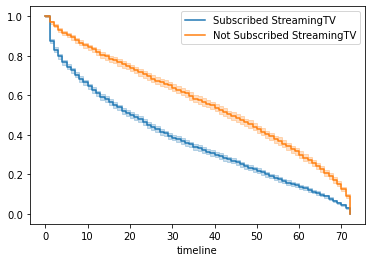

In [18]:
t = tc.tenure
streams = tc['StreamingTV'] ## for some unknown reason, the fit bugs out if I try to use tc.StreamingTV
ix = (streams=="Yes")

kmf = KaplanMeierFitter()
kmf.fit(t[~ix], label='Subscribed StreamingTV')
ax = kmf.plot_survival_function()
kmf.fit(t[ix], label='Not Subscribed StreamingTV')
ax = kmf.plot_survival_function(ax=ax)

In [19]:
est = sm.OLS(
    tc.tenure,
        sm.add_constant(tc.Churn)
).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     997.3
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          8.00e-205
Time:                        23:34:45   Log-Likelihood:                -32072.
No. Observations:                7043   AIC:                         6.415e+04
Df Residuals:                    7041   BIC:                         6.416e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5700      0.320    117.562      0.000      36.944      38.196
Churn        -19.5908      0.620    -31.580      0.000     -20.807     -18.375
==============================================================================
Omnibus:                     3985.094   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.232
Skew:                           0.160   Prob(JB):                     4.13e-91
Kurtosis:                       1.853   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
est.predict([1,1])

array([17.97913323])